## <b> <span style='color:#e61227'>|</span> AI WORKSHOP | Object Detection with Deep Learning </b>

- INFRAPLUS WORKSHOP 2024
- Lecturer: Kao

![](https://github.com/kaopanboonyuen/pattern-recognition/raw/main/img/infra_logo.jpg)

Reference: Kaggle Code

In [6]:
from IPython.core.display import display, HTML, Javascript

color_map = ['#FFFFFF','#FF5733']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s;
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h):
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba,
                                            main_color,  main_color, prompt, main_color, main_color,
                                            main_color, main_color))

def nb():
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()


![](https://learnopencv.com/wp-content/uploads/2023/01/evolution-of-yolo-models-1024x576.png)

## <b>1 <span style='color:#e61227'>|</span> Introduction</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.1 |</span></b> Object Detection </b></p>
</div>

**Computer vision** is a field of artificial intelligence that focuses on teaching computers to interpret and understand visual information. One popular and powerful technique used in computer vision for object detection is called **YOLO**, which stands for "You Only Look Once".

YOLO aims to identify and locate objects in an image or video stream in real-time. Unlike traditional methods that rely on complex pipelines and multiple passes, YOLO takes a different approach by treating object detection as a single regression problem.

This algorithm divides the input image into a grid and predicts bounding boxes and class probabilities for objects within each grid cell. It simultaneously predicts the class labels and their corresponding bounding boxes, making it incredibly efficient and fast. YOLO is known for its real-time performance, enabling it to process images and videos at impressive speeds.

By leveraging **deep convolutional neural networks**, YOLO can learn to recognize a wide range of objects and accurately localize them within an image. It can detect multiple objects of different classes simultaneously, making it particularly useful for applications where **real-time processing** and high detection accuracy are crucial, such as **autonomous driving**, **video surveillance**, and **robotics**.


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.2 |</span></b> YOLOv8 </b></p>
</div>

**YOLOv8** is the latest version of the YOLO AI model developed by **Ultralytics**, which has shown effectiveness in tackling tasks such as **classification**, **object detection**, and **image segmentation**. **YOLOv8 models** are fast, accurate, and easy to use, making them ideal for various object detection and image segmentation tasks. They can be trained on large datasets and run on diverse hardware platforms, from **CPUs** to **GPUs**.
YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. **yolov8n.pt** ,and are pre-trained on COCO. See [Detection Docs ](https://docs.ultralytics.com/tasks/detect/) for full details.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.3 |</span></b> Study Aim </b></p>
</div>

Implementing **Sign Detection** using **YOLOv8** holds tremendous potential across a wide range of practical applications. For example, it can greatly enhance **traffic management systems**, allowing for the efficient detection and recognition of various traffic signs. This technology can play a vital role in improving road safety by enabling vehicles to accurately interpret and respond to the information conveyed by road signs. Moreover, sign detection using YOLOv8 can assist in urban planning and infrastructure development by analyzing the presence and condition of signs in different areas

By undertaking this project, I aimed to harness the power of YOLOv8 to develop a **reliable signs detection solution** with the potential to improve various domains that rely on precise and efficient signs identification.


## <b>2 <span style='color:#e61227'>|</span> Install And Import Essential Libreries</b>


In [7]:
# Install Essential Libraries
!pip install ultralytics

In [8]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

## <b>3 <span style='color:#e61227'>|</span> Dataset</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Show Original Images Before Detect </b></p>
</div>

***3.1.1. Show Some Images From TrainSet***

In [9]:
!wget https://github.com/kaopanboonyuen/deep_learning_for_vision/raw/main/dataset/traffic-signs-dataset.zip

--2024-03-01 01:59:37--  https://github.com/kaopanboonyuen/deep_learning_for_vision/raw/main/dataset/traffic-signs-dataset.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kaopanboonyuen/deep_learning_for_vision/main/dataset/traffic-signs-dataset.zip [following]
--2024-03-01 01:59:37--  https://raw.githubusercontent.com/kaopanboonyuen/deep_learning_for_vision/main/dataset/traffic-signs-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92844749 (89M) [application/zip]
Saving to: ‘traffic-signs-dataset.zip’

traffic-signs-datas 100%[===================>]  88.54M   225MB/s    in 0.4s  

In [10]:
!unzip traffic-signs-dataset.zip >> dev.txt

In [11]:
# /content/traffic-signs-dataset

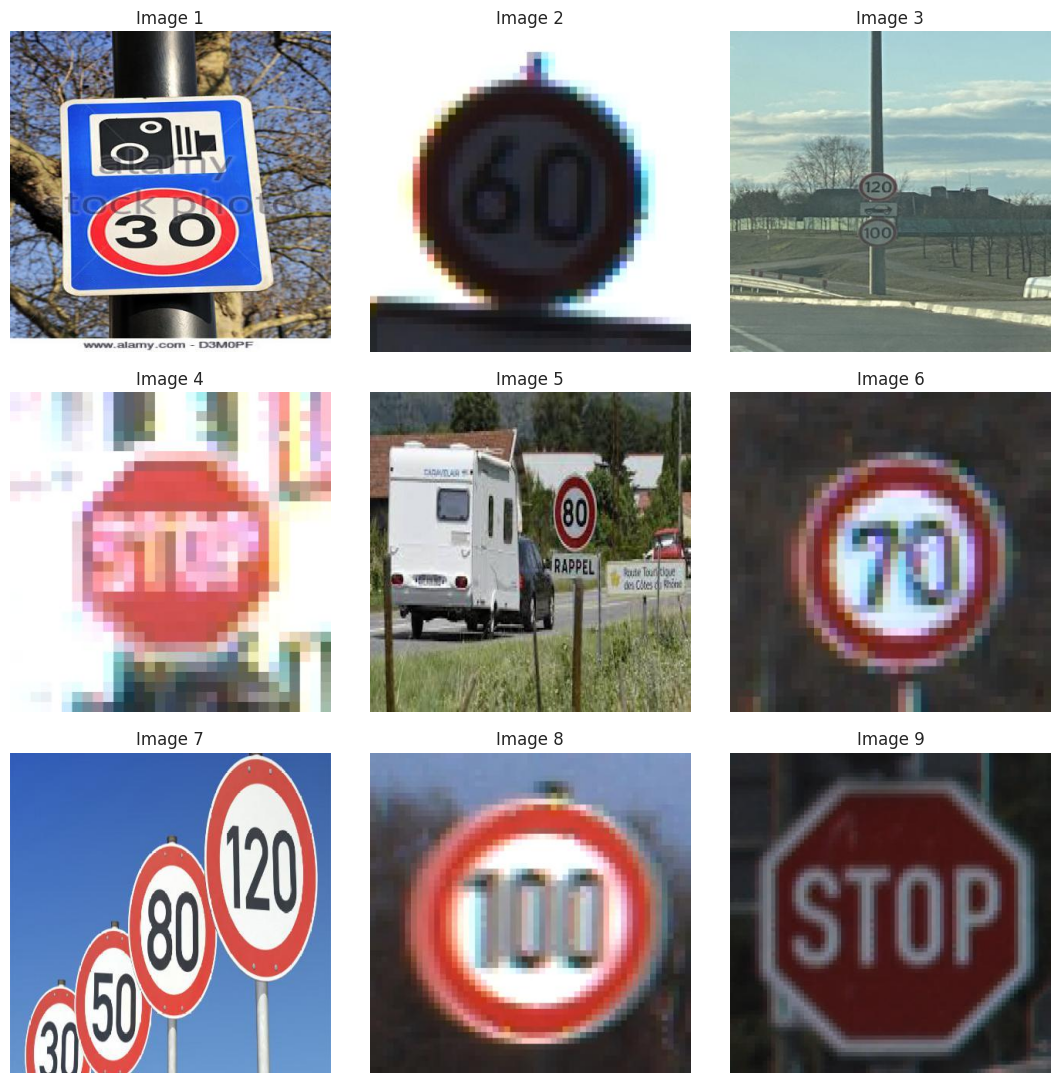

In [12]:
Image_dir = '/content/traffic-signs-dataset/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

***3.1.2. Get Shape Of An Image For Using In Training Step***

In [13]:
# Get the size of the image
image = cv2.imread("/content/traffic-signs-dataset/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


## <b>4 <span style='color:#e61227'>|</span> Try Pre-trained YOLOv8 For Detect Traffic Signs  </b>

100%|██████████| 6.23M/6.23M [00:00<00:00, 46.9MB/s]



image 1/1 /content/traffic-signs-dataset/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 416x416 1 traffic light, 639.2ms
Speed: 12.0ms preprocess, 639.2ms inference, 36.9ms postprocess per image at shape (1, 3, 416, 416)


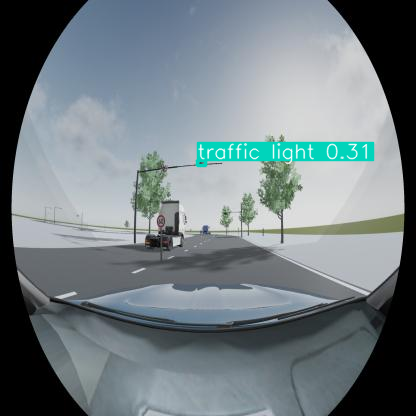

In [14]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/traffic-signs-dataset/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

## <b>5 <span style='color:#e61227'>|</span> YOLOv8-Based Traffic Signs Detection Model</b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.1 |</span></b> Model Training Using Customized Dataset Of Traffic Signs </b></p>
</div>
        
***Mean Average Precision (mAP)*** is a metric used to evaluate the effectiveness of object detection algorithms in identifying and locating objects within images. It takes into account both precision and recall across different categories. By calculating the Average Precision (AP) for each category and taking the average, mAP provides an overall assessment of the algorithm's performance.

If the obtained mAP after the final epoch is not satisfactory, there are several options available to improve the results:
- Extending the training process by increasing the number of **epochs**: Training for more epochs allows the model to learn more patterns and potentially improve its performance. You can specify a higher value for the --epochs argument when running the training command.
- Experimenting with different **parameter values**: You can try adjusting various parameters to see if they have a positive impact on the results. Some parameters to consider are:
- **Batch Size:** Changing the batch size can affect the convergence and generalization of the model. You can modify the --batch-size argument to find an optimal value.
- **Initial Learning Rate (lr0)**: The initial learning rate determines the step size at the beginning of the training process. You can tune the --lr0 parameter to control how quickly the model learns.
- **Learning Rate Range (lrf)**: The learning rate range determines the range of learning rates used during the training. Experimenting with different values for --lrf can help find a better learning rate schedule.
- **Selecting a different optimizer**: The optimizer is responsible for updating the model's parameters based on the calculated gradients. Changing the optimizer can sometimes lead to better convergence and results. Ultralytics YOLOv8 supports different optimizers such as SGD, Adam, and RMSprop. You can try using a different optimizer by modifying the --optimizer argument.

For more details on resuming interrupted trainings and additional training options, you can refer to the Ultralytics YOLOv8 documentation.
        
In order to optimize the performance of the model, we have conducted experiments with different parameter values and optimizers. During the training phase, I explored various combinations of epochs, batch sizes, initial learning rates (lr0), and dropout values. The following values were used for experimentation:

- Epochs: ***10***, ***50***, ***100***
- Batch sizes: ***8***, ***16***, ***32***, ***64***
- Initial learning rates (lr0): ***0.001***, ***0.0003***, ***0.0001***
- Dropout: ***0.15***, ***0.25***

Furthermore, we have evaluated the model's performance using different optimizers, including **Adam**, **SGD**, and **auto**. By employing these optimizers, we aimed to assess their impact on the model's convergence and overall results.

After rigorous experimentation and training, we are pleased to present the results of our findings. The performance of the YOLOv8 model was assessed based on various metrics, including Mean Average Precision (mAP).


***5.1.1. Training Step***

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/traffic-signs-dataset/data.yaml",epochs=10, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 0)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/traffic-signs-dataset/data.yaml, epochs=10, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

train: Scanning /content/traffic-signs-dataset/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/traffic-signs-dataset/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.91G     0.8227      3.607      1.059         15        416: 100%|██████████| 56/56 [00:39<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]

                   all        801        944      0.276      0.322      0.187      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.03G     0.7008      2.464     0.9502         14        416: 100%|██████████| 56/56 [00:34<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944      0.328      0.476      0.331      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.03G      0.687      1.999     0.9375         12        416: 100%|██████████| 56/56 [00:40<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        801        944      0.461       0.52        0.5      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.03G     0.6693      1.658     0.9338         12        416: 100%|██████████| 56/56 [00:36<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.22s/it]

                   all        801        944      0.672      0.603       0.67      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.03G     0.6311       1.35     0.9147         12        416: 100%|██████████| 56/56 [00:42<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        801        944      0.678      0.612      0.675      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.03G     0.6284      1.179     0.9123         12        416: 100%|██████████| 56/56 [00:36<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        801        944      0.858      0.676      0.798      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.03G     0.6018       1.01     0.9049         14        416: 100%|██████████| 56/56 [00:38<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944       0.91      0.699      0.824      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.03G     0.5789     0.8902     0.8878         10        416: 100%|██████████| 56/56 [00:37<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        801        944       0.84      0.774      0.847      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.03G     0.5526     0.7884     0.8828         15        416: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944      0.927      0.783      0.871      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.03G     0.5348     0.7254     0.8767         10        416: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        801        944      0.901        0.8      0.877      0.762



10 epochs completed in 0.125 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.37s/it]


                   all        801        944      0.901      0.801      0.877      0.762
           Green Light        801        122      0.742      0.574      0.657      0.392
             Red Light        801        108      0.838      0.577      0.661      0.407
       Speed Limit 100        801         52      0.844      0.885      0.921      0.839
       Speed Limit 110        801         17      0.941      0.765      0.909      0.851
       Speed Limit 120        801         60      0.922      0.883      0.955      0.862
        Speed Limit 20        801         56          1      0.905       0.97      0.828
        Speed Limit 30        801         74       0.93      0.904      0.947       0.87
        Speed Limit 40        801         55      0.943      0.891      0.946      0.835
        Speed Limit 50        801         71      0.915      0.746      0.893      0.802
        Speed Limit 60        801         76      0.916      0.829      0.902      0.809
        Speed Limit 7

***5.1.2. Validation Step***

In [ ]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

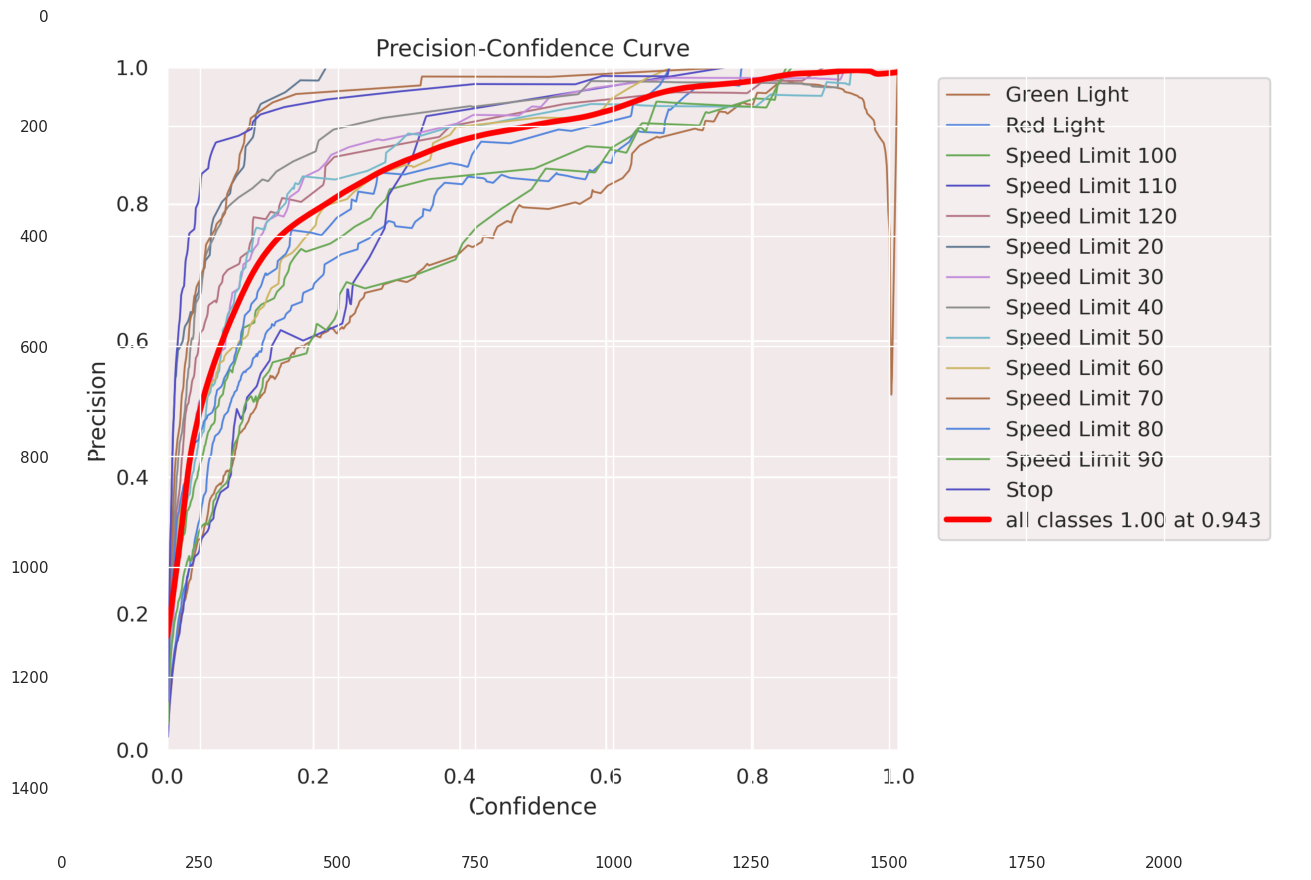

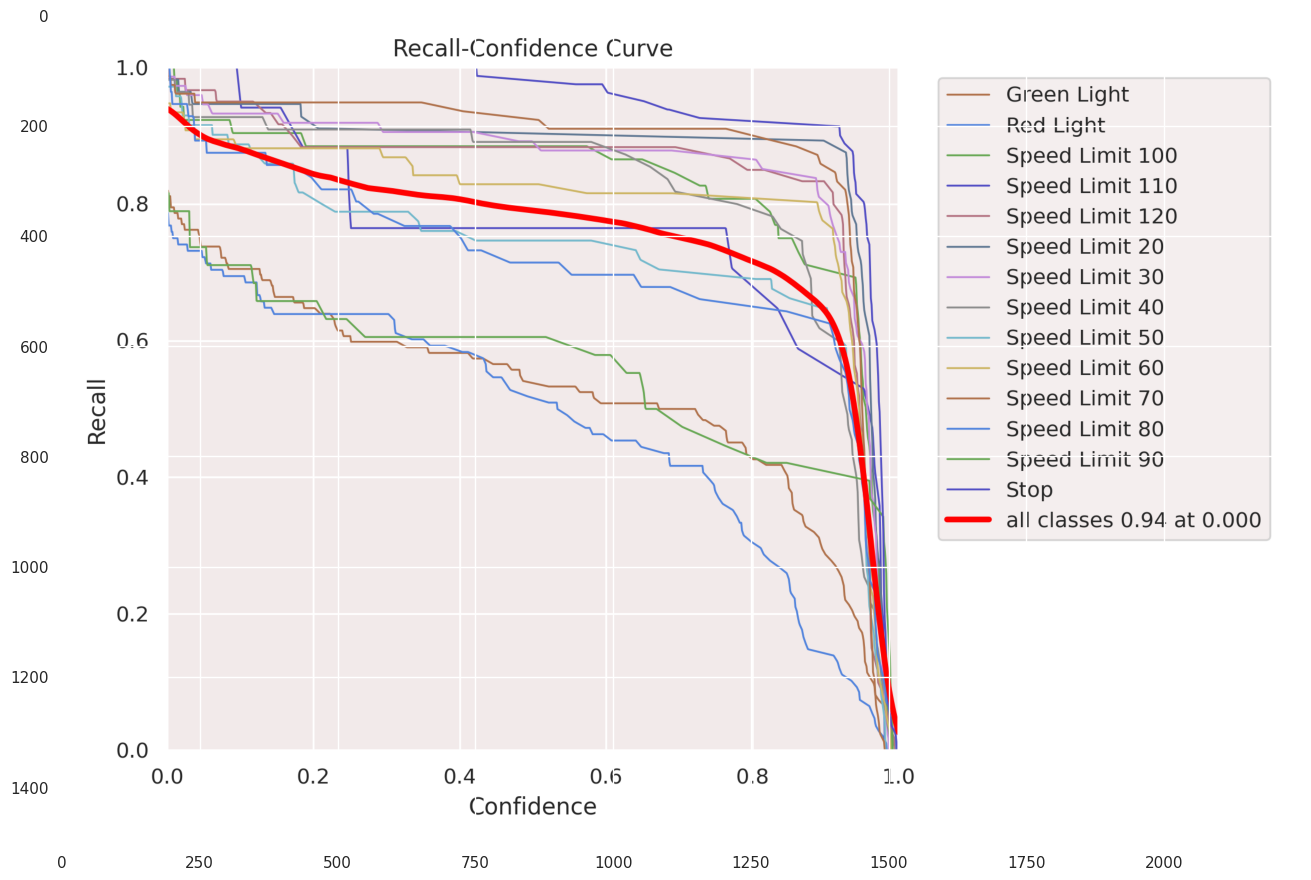

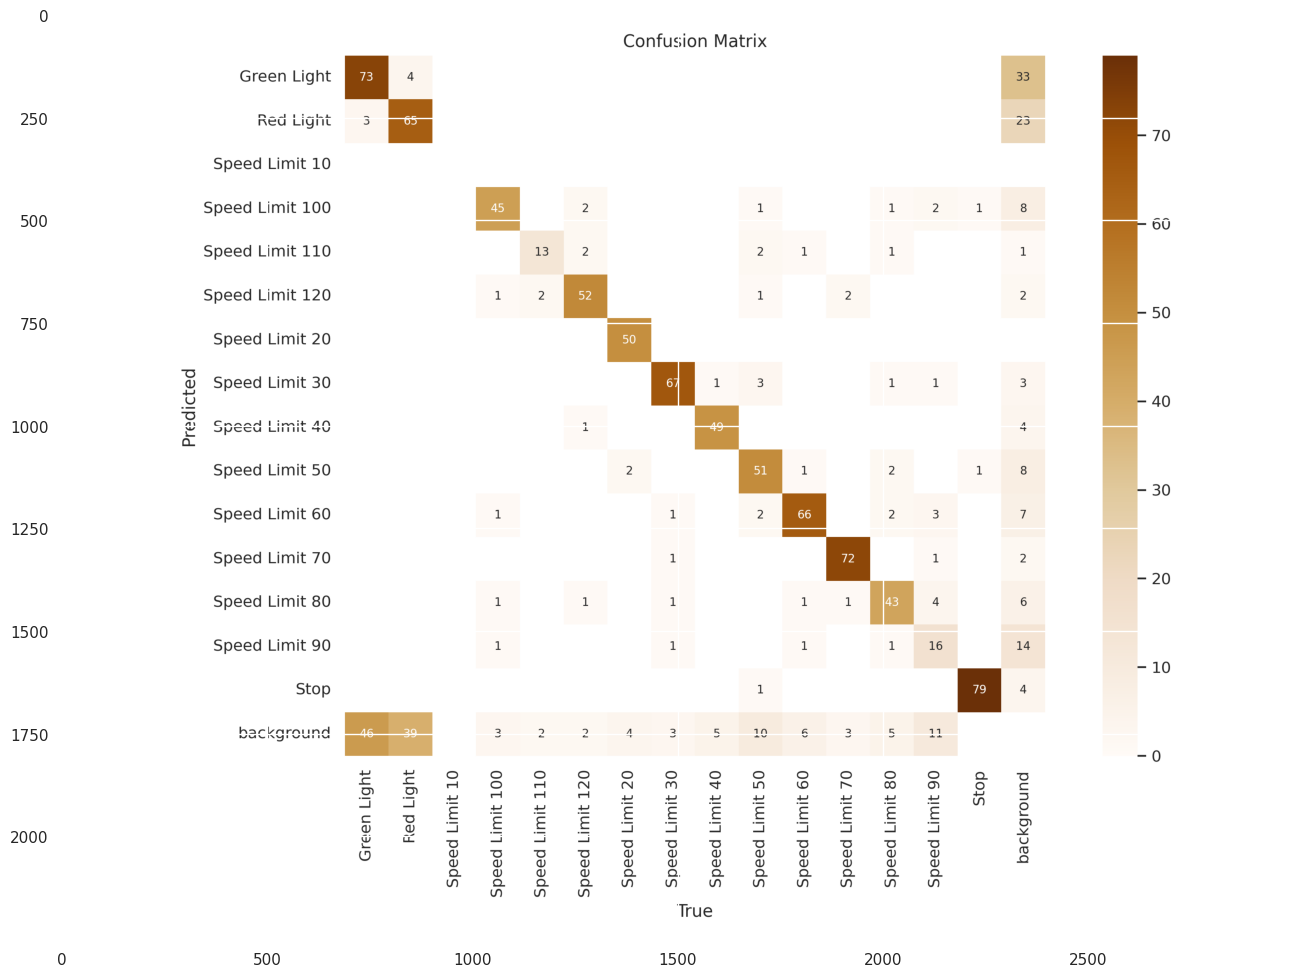

In [ ]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/content/runs/detect/train/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [ ]:
Result_Final_model = pd.read_csv('runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
0                        1                  0.82272                  3.60720   
1                        2                  0.70082                  2.46350   
2                        3                  0.68697                  1.99870   
3                        4                  0.66929                  1.65800   
4                        5                  0.63106                  1.35040   
5                        6                  0.62835                  1.17850   
6                        7                  0.60184                  1.00960   
7                        8                  0.57889                  0.89022   
8                        9                  0.55258                  0.78836   
9                       10                  0.53481                  0.72541   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                  1.05910                  0.27604                  0.32222   
1                  0.95024                  0.32753                  0.47569   
2                  0.93750                  0.46138                  0.51996   
3                  0.93380                  0.67198                  0.60293   
4                  0.91469                  0.67823                  0.61216   
5                  0.91231                  0.85841                  0.67573   
6                  0.90493                  0.90969                  0.69945   
7                  0.88778                  0.83973                  0.77448   
8                  0.88282                  0.92681                  0.78300   
9                  0.87669                  0.90136                  0.80028   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.18712                  0.15214                  0.69371   
1                  0.33126                  0.26697                  0.73651   
2                  0.49967                  0.41787                  0.70600   
3                  0.66998                  0.55782                  0.68697   
4                  0.67451                  0.57067                  0.64799   
5                  0.79784                  0.67105                  0.63735   
6                  0.82357                  0.70129                  0.60033   
7                  0.84687                  0.72846                  0.58973   
8                  0.87145                  0.75333                  0.56393   
9                  0.87740                  0.76197                  0.55135   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                  3.05000                  0.94808                 0.000172   
1                  2.38140                  0.97541                 0.000313   
2                  1.96530                  0.97333                 0.000419   
3                  1.29740                  0.94198                 0.000370   
4                  1.26930                  0.92070                 0.000370   
5                  0.98898                  0.92088                 0.000318   
6                  0.81138                  0.89358                 0.000266   
7                  0.73117                  0.89979                 0.000214   
8                  0.62131                  0.88435                 0.000161   
9                  0.58142                  0.87701                 0.000109   

                    lr/pg1                   lr/pg2  
0                 0.000172                 0.000172  
1                 0.000313                 0.000313  
2                 0.000419                 0.000419  
3                 0.000370                 0.000370  
4                 0.000370                 0.000370  
5                 0.000318                 0.000318  
6                 0.000266                 0.000266  
7                 0.000214                 0.000214  
8          

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.2 |</span></b> Validation of the Model By TestSet </b></p>
</div>

In [ ]:
# Loading the best performing model
Valid_model = YOLO('runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/traffic-signs-dataset/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:00<00:00, 1845.09it/s]

val: New cache created: /content/traffic-signs-dataset/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:08<00:00,  4.65it/s]


                   all        638        770      0.892      0.707       0.81      0.695
           Green Light        638        110      0.827      0.609      0.756      0.453
             Red Light        638         94      0.846      0.532      0.664      0.412
        Speed Limit 10        638          3          1          0      0.235      0.166
       Speed Limit 100        638         46      0.741       0.81      0.875      0.763
       Speed Limit 110        638         21          1      0.666      0.775       0.71
       Speed Limit 120        638         44      0.923      0.932      0.934      0.835
        Speed Limit 20        638         46          1      0.845      0.969      0.857
        Speed Limit 30        638         60      0.933      0.817      0.872      0.811
        Speed Limit 40        638         53      0.885      0.868      0.938      0.821
        Speed Limit 50        638         50      0.918      0.671      0.786      0.725
        Speed Limit 6

In [ ]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.8921952463523086
metrics/recall(B):  0.7070917539843188
metrics/mAP50(B):  0.8099393097759654
metrics/mAP50-95(B):  0.6946785229713675


**Tip: Based on the observed results, it is evident that the accuracy of the model on both the validation and test data sets exhibits a high degree of similarity. This outcome serves as an indication that the model has been appropriately trained.**

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.3 |</span></b> Making Predictions On Test Images </b></p>
</div>

In [ ]:
# Path to the directory containing the images
image_dir = '/content/traffic-signs-dataset/test/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 1 Speed Limit 80, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train32

0: 416x416 2 Red Lights, 19.1ms
Speed: 1.6ms preprocess, 19.1ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train33

0: 416x416 1 Speed Limit 60, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train34

0: 416x416 1 Speed Limit 40, 1 Stop, 9.8ms
Speed: 1.0ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train35

0: 416x416 1 Speed Limit 80, 9.9ms
Speed: 1.1ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train36

0: 416x416 1 Stop, 11.4ms
Speed: 1.0ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/d

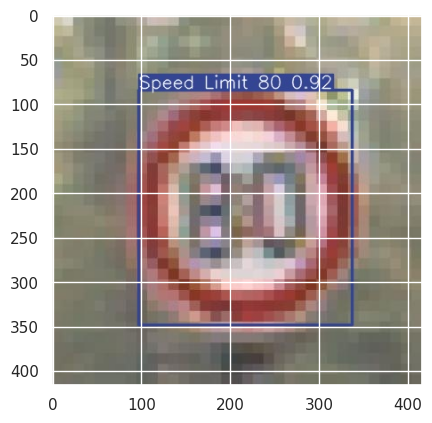

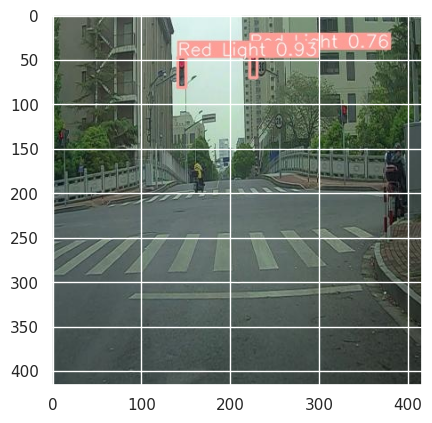

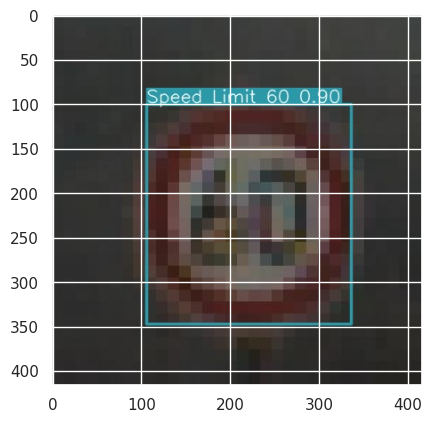

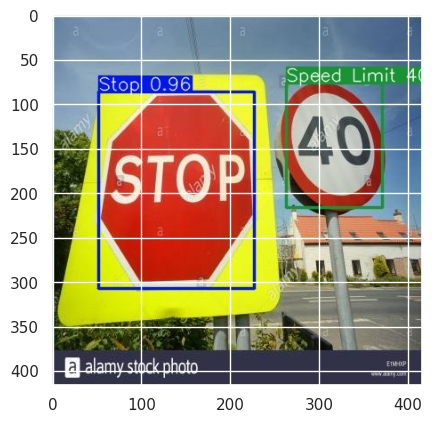

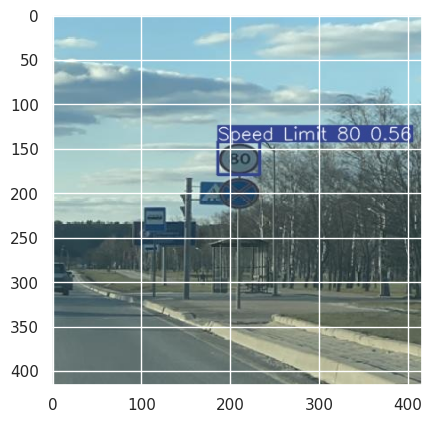

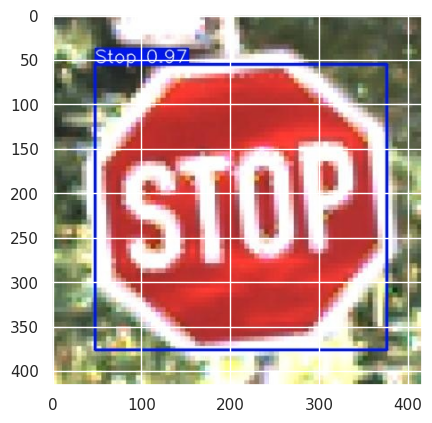

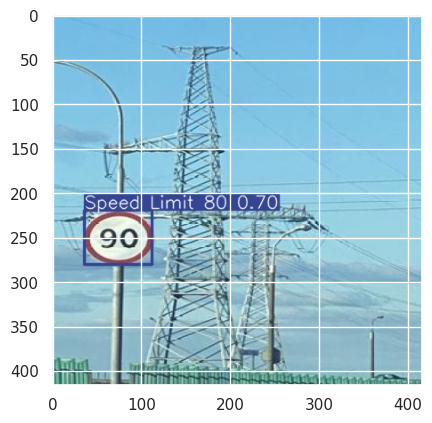

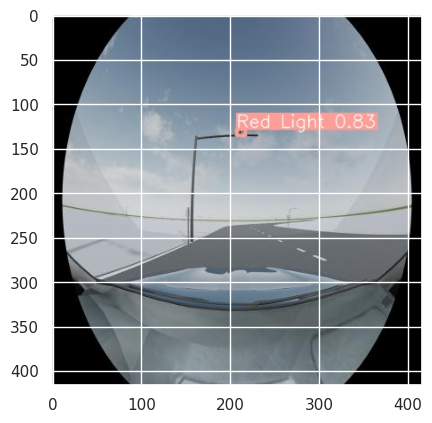

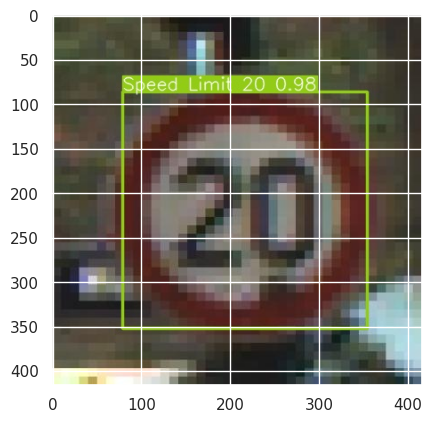

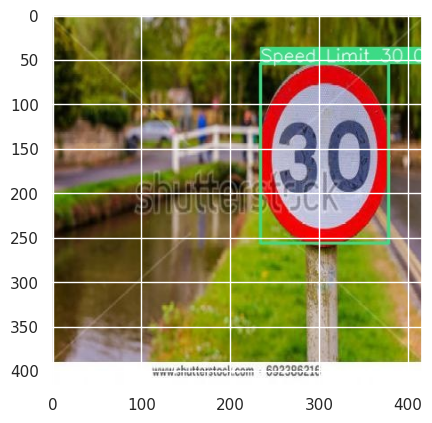

In [ ]:
# View results
for i in range(2,12):
    plt.imshow(plt.imread(f'runs/detect/train{i}/image0.jpg'))
    plt.show()

## <b>6 <span style='color:#e61227'>|</span> Export The Final Model Of Detect Traffic Signs </b>

**Tip:** The ultimate goal of training a model is to deploy it for real-world applications. Export mode in Ultralytics YOLOv8 offers a versatile range of options for exporting your trained model to different formats, making it deployable across various platforms and devices.

In [ ]:
# # Export the model
# video_model.export(format='onnx')

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.0.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.14.1 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 1.0s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (2.9s)
Results saved to /kaggle/working
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n.onnx'

## <b>7 <span style='color:#e61227'>|</span> Try Pre-trained YOLOv8 For Detect Traffic Signs From Video  </b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>7.1 |</span></b> Show Original Video Before Detect </b></p>
</div>

**Tip: Due to the substantial volume of the video generated from the image dataset, I have to utilize only a truncated segment of the original video for this project.**

In [ ]:
# # Convert mp4
# !ffmpeg -y -loglevel panic -i video.mp4 output.mp4

# # Display the video
# Video("output.mp4", width=960)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>7.2 |</span></b> Predict By Pr-Trained YOLOv8 </b></p>
</div>

In [ ]:
# # Load a pr-trained model
# video_model = YOLO("yolov8n.pt")

# # Use the model to detect signs
# video_model.predict(source="/video.mp4", show=True, save = True)

In [ ]:
# # show result
# # Convert format
# !ffmpeg -y -loglevel panic -i /runs/detect/predict/video.avi result_out.mp4

# # Display the video
# Video("result_out.mp4", width=960)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> Thank you for taking the time to review my notebook. If you have any questions or criticisms, please kindly let me know in the comments section.  </b></p>
</div>
